# <center>Concrete Compressive Strength Prediction 🧱<center>

<center><img width="750px" src="https://cdn.pixabay.com/photo/2015/03/27/18/30/crack-695010_960_720.jpg"></center>

# About the Dataset

* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Blast** Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- *Input Variable*
* **Age** -- quantitative -- Day (1~365) -- *Input Variable*
* **Concrete Compressive Strength** -- quantitative -- MPa -- *Output Variable*

# Importing the Essential Libraries, Metrics and Models

In [1]:
import numpy as np
!pip install --upgrade pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Users\Faiz\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the Data

In [2]:
df = pd.read_csv("Concrete_Data_Set.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(1030, 9)

***Checking the dtypes of columns' and how many non-null values are there in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Handling Missing Values and Duplicates

***It seems that there is no missing value in the columns.***

In [7]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

***Checking for duplicates in data and it can easily seen that there are 25 duplicated values.***

In [8]:
df.duplicated().sum()

25

***Dropping all the duplicated values from the dataset.***

In [9]:
df.drop_duplicates(inplace=True)

# Data Visualization

***Visualizing the Correlation between the numerical variables using pairplot visualization.***

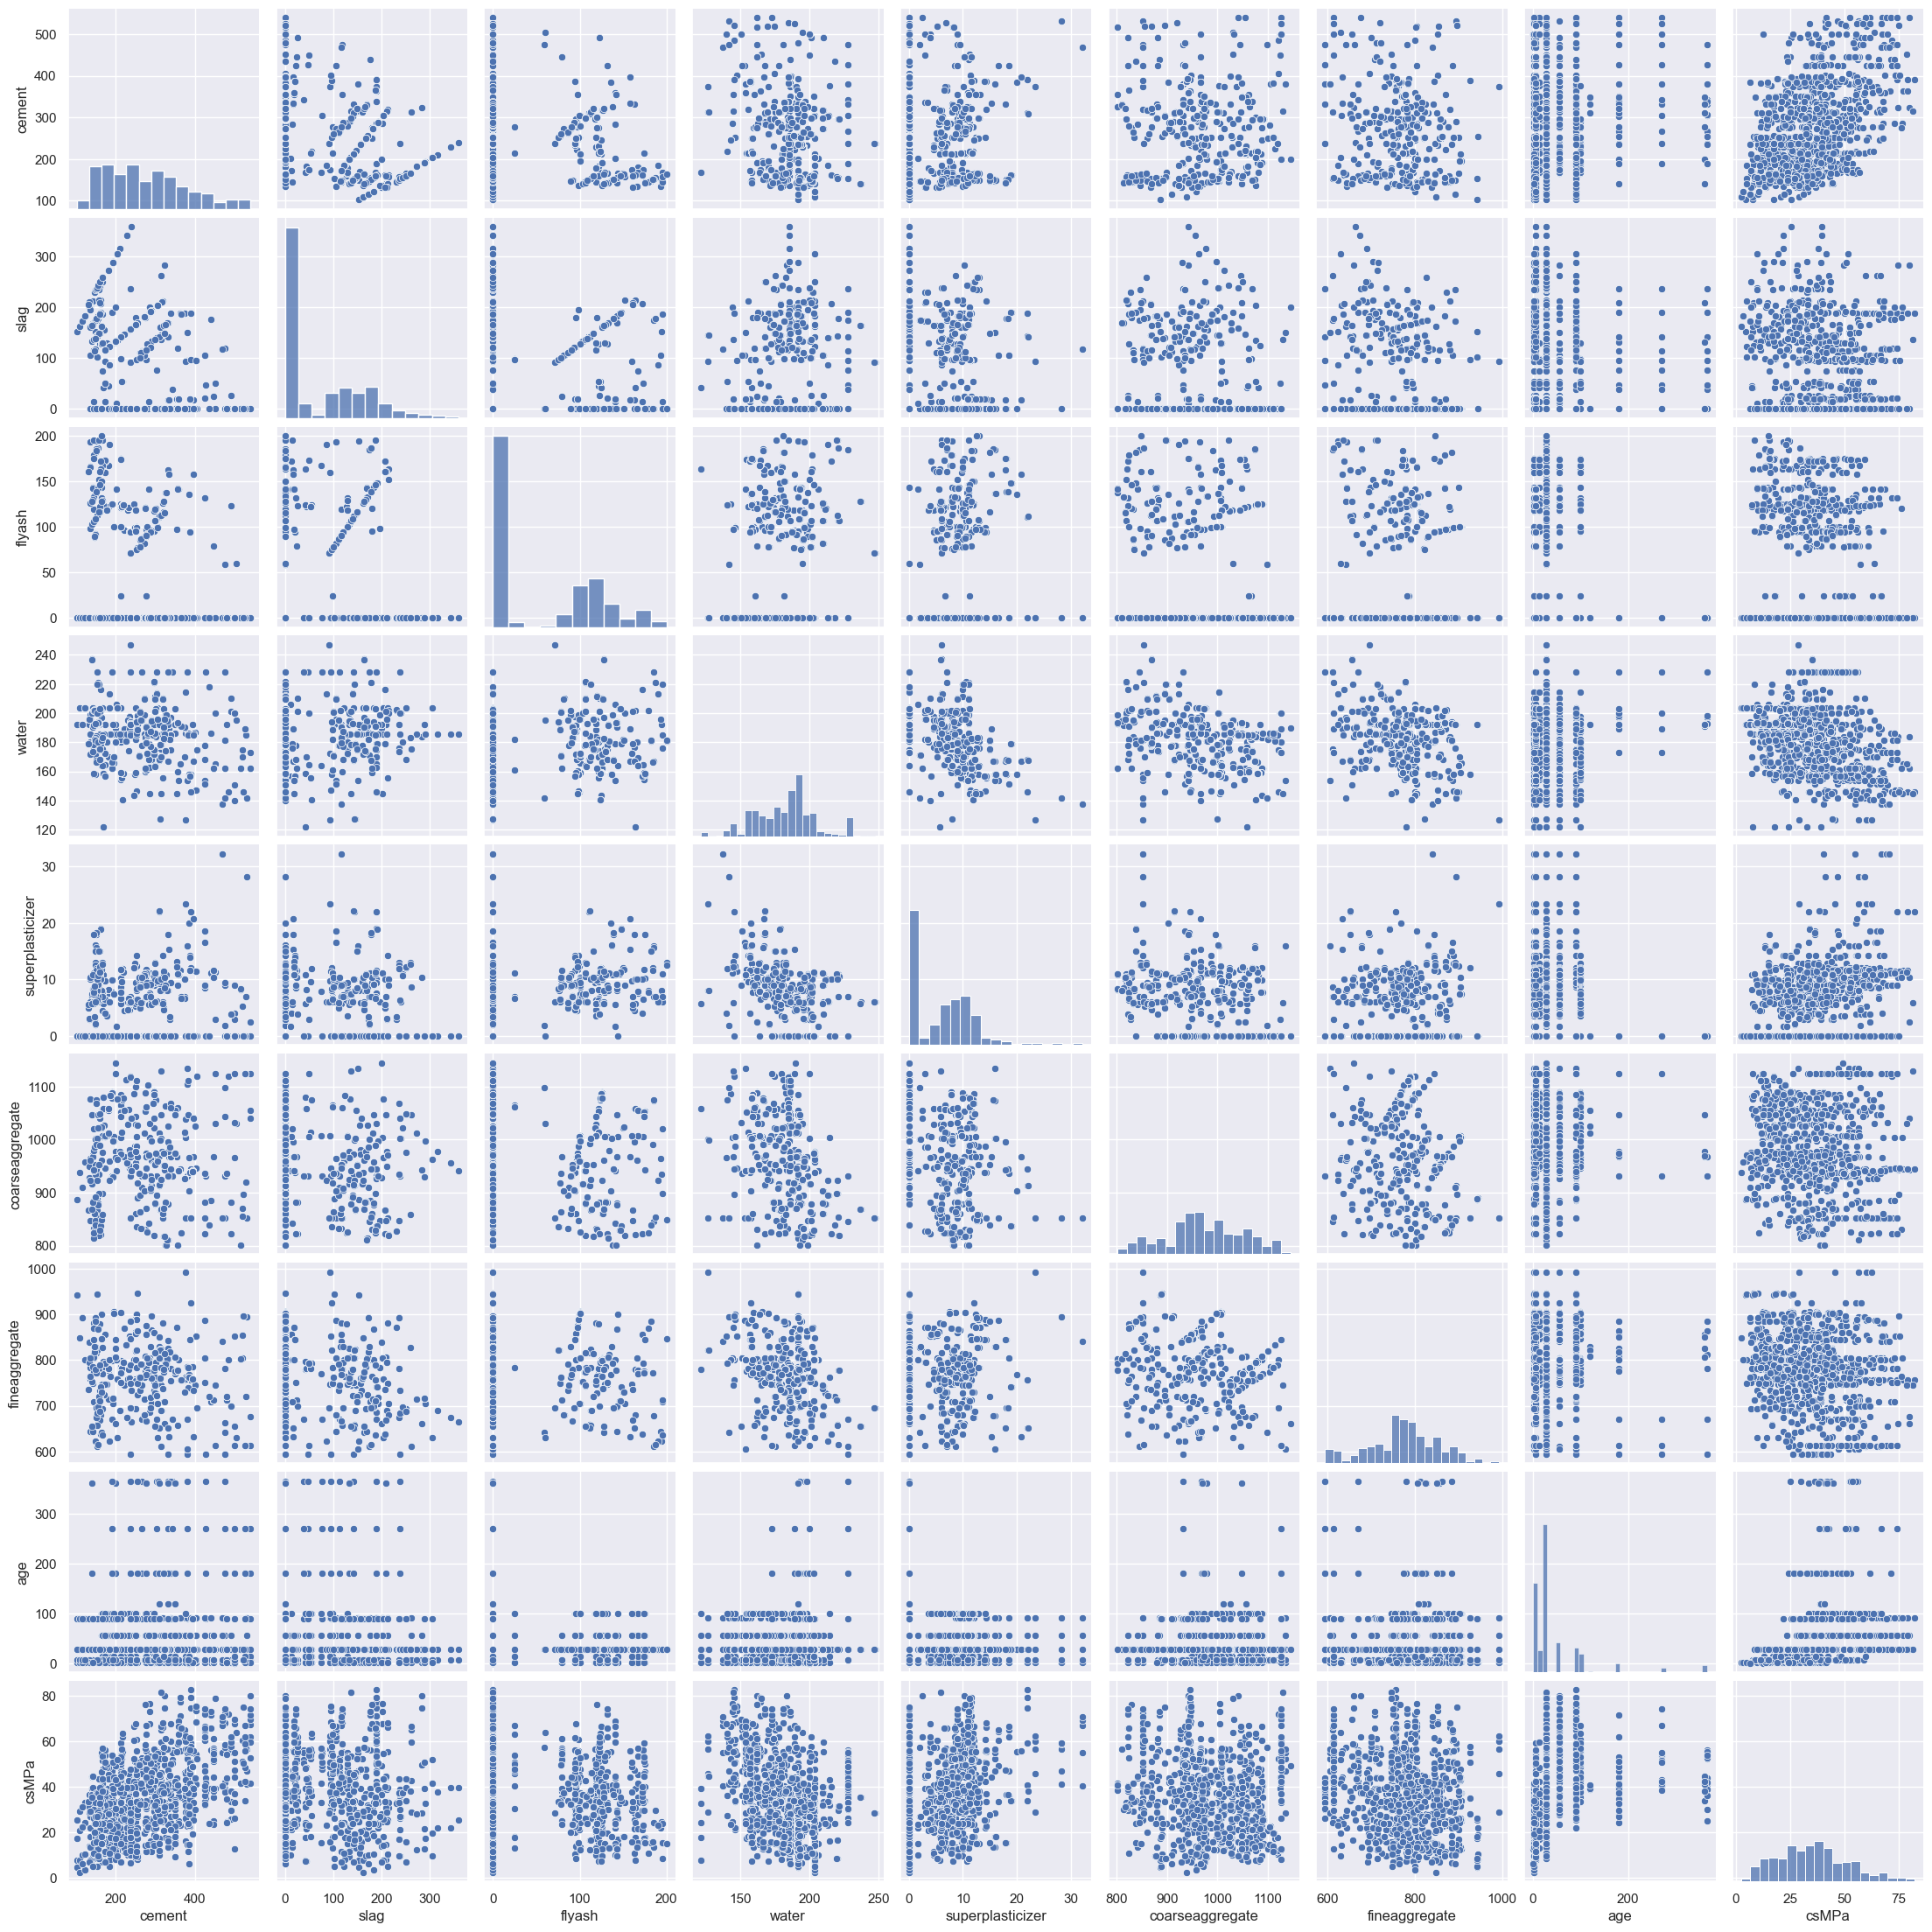

In [10]:
sns.set_theme()
sns.pairplot(df)

<h2 style="font-family: Times New Roman">Distribution of Each Variable</h2>

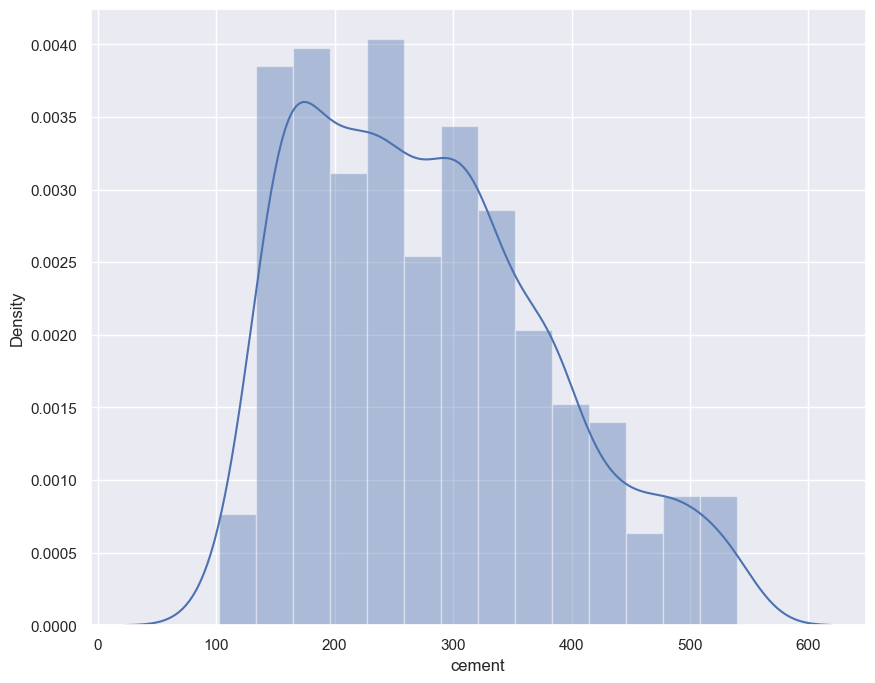

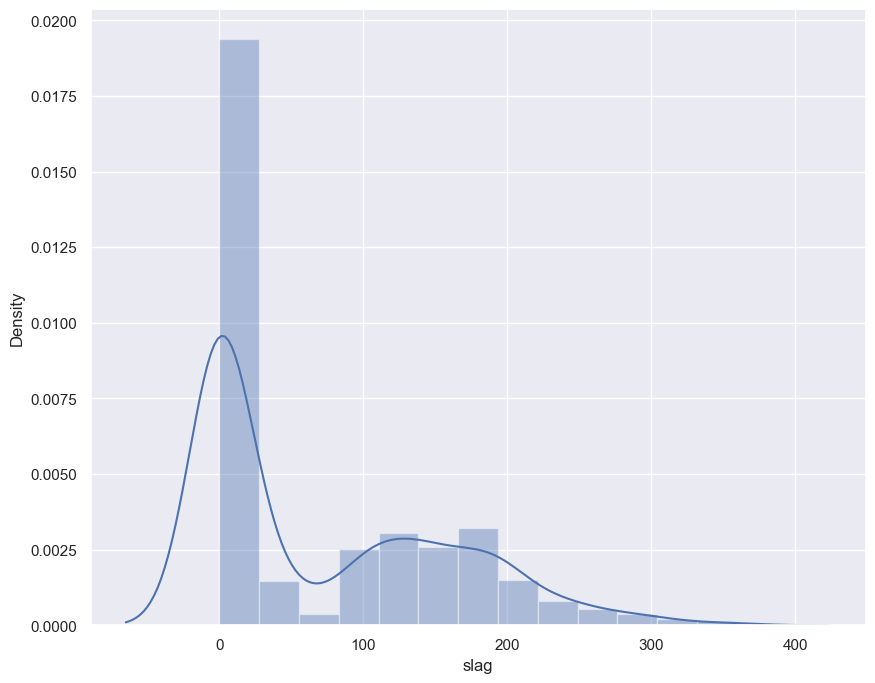

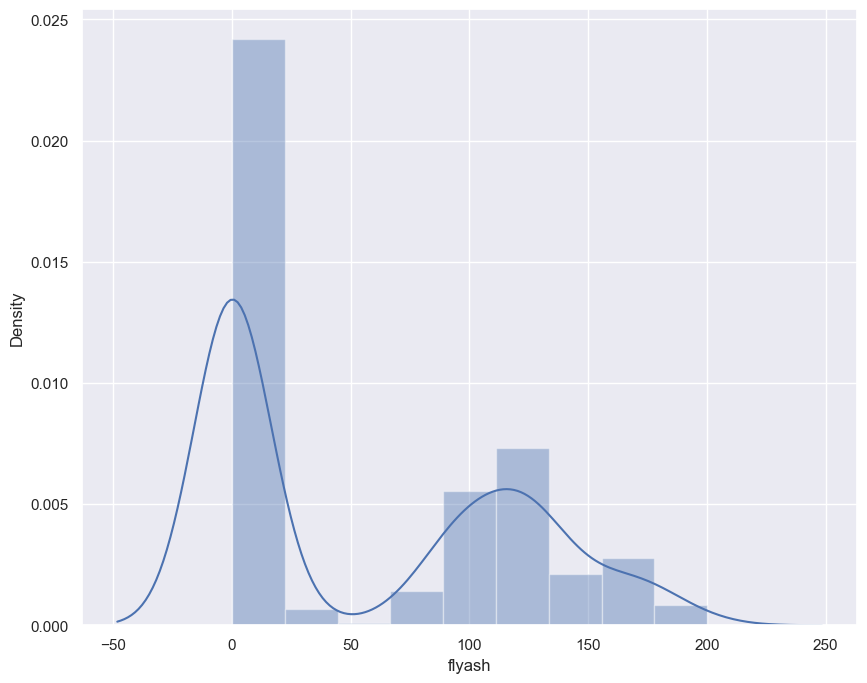

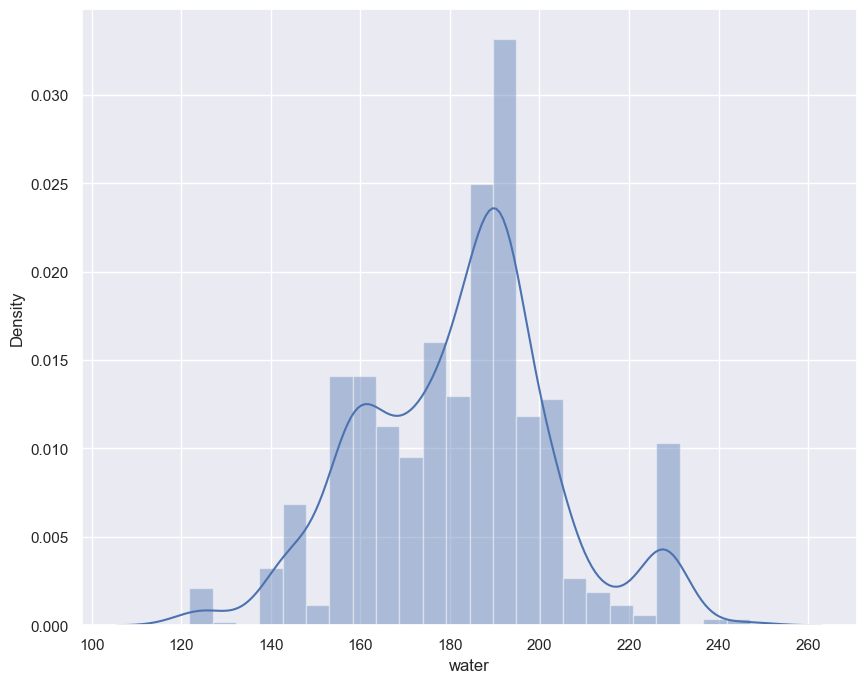

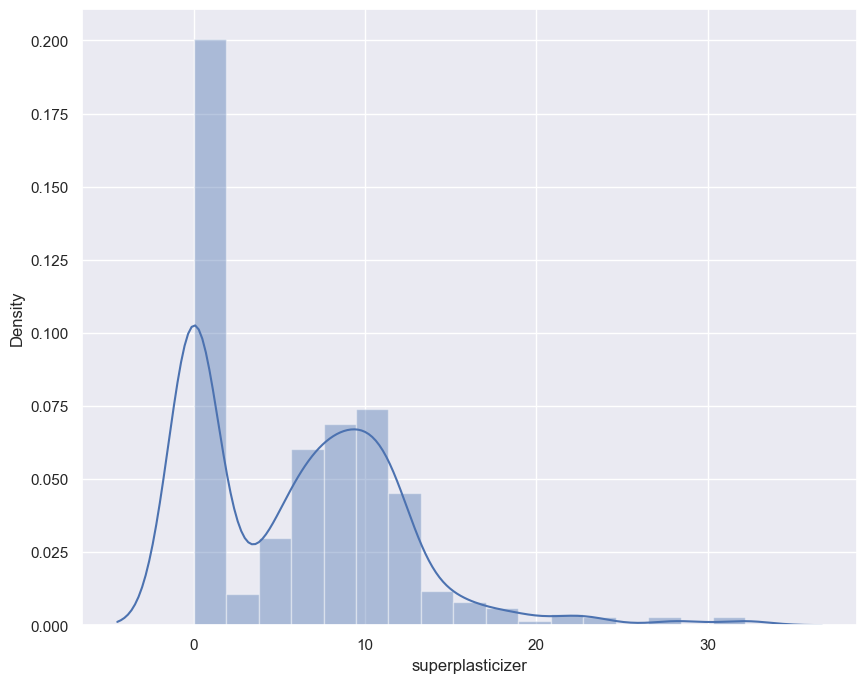

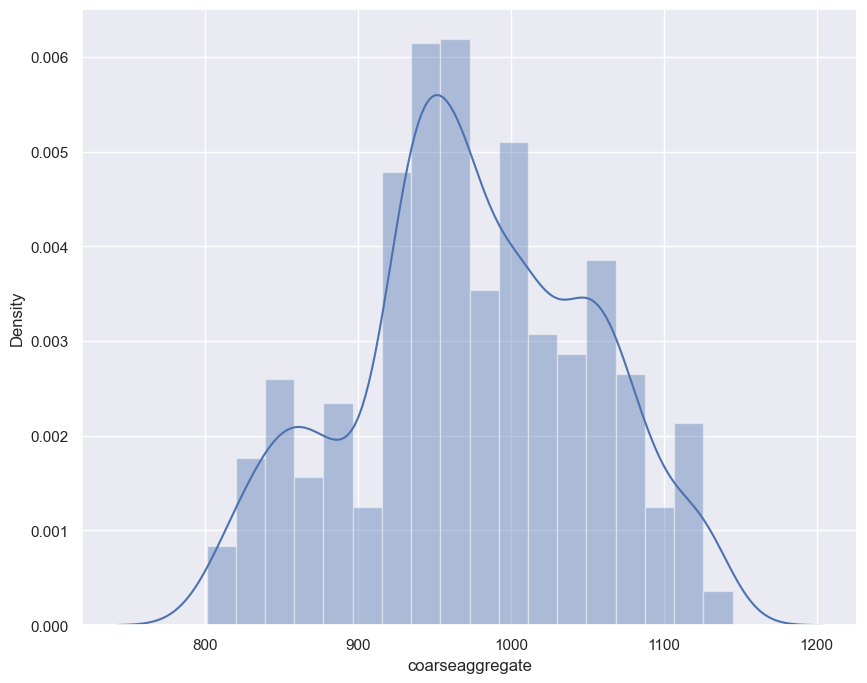

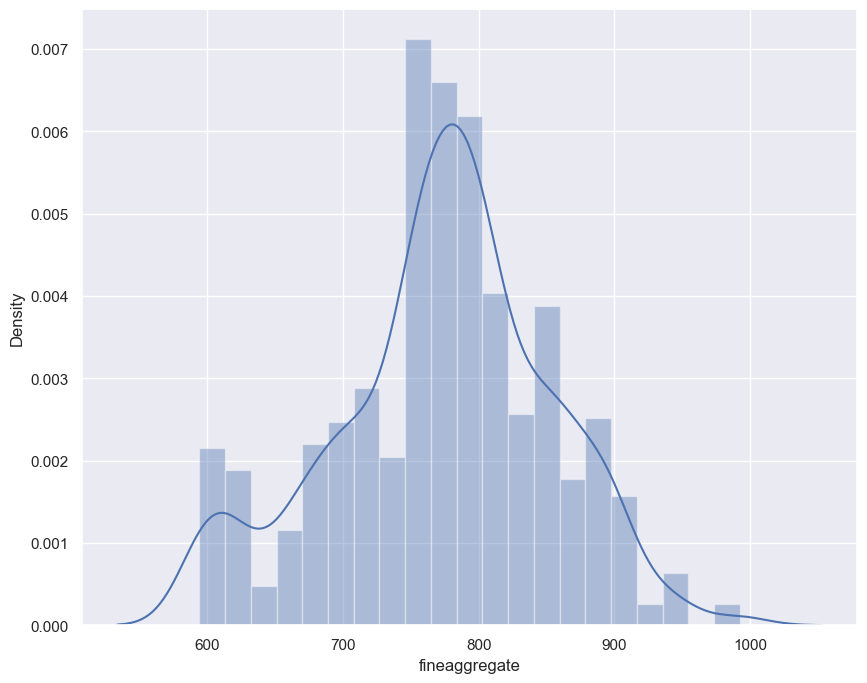

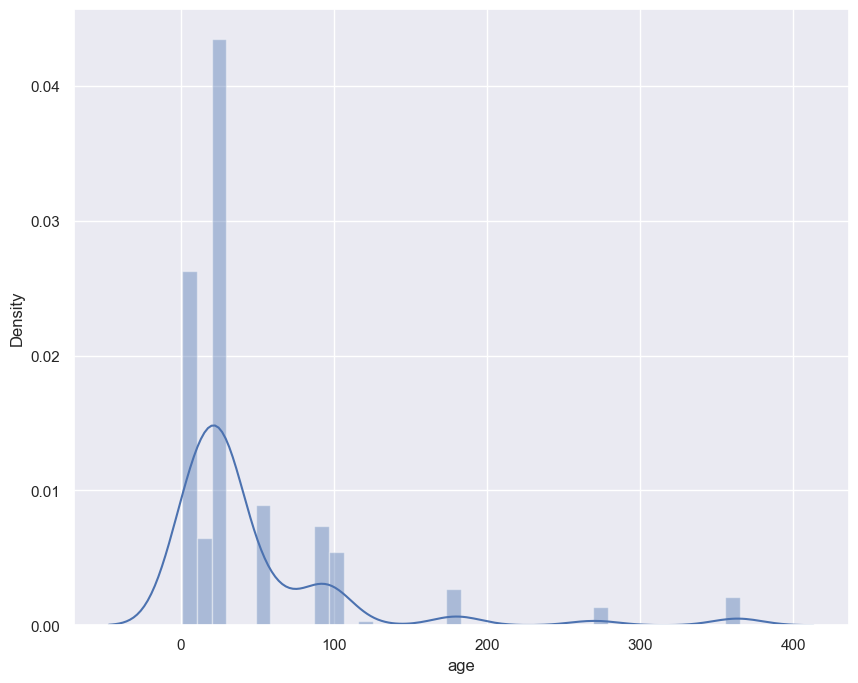

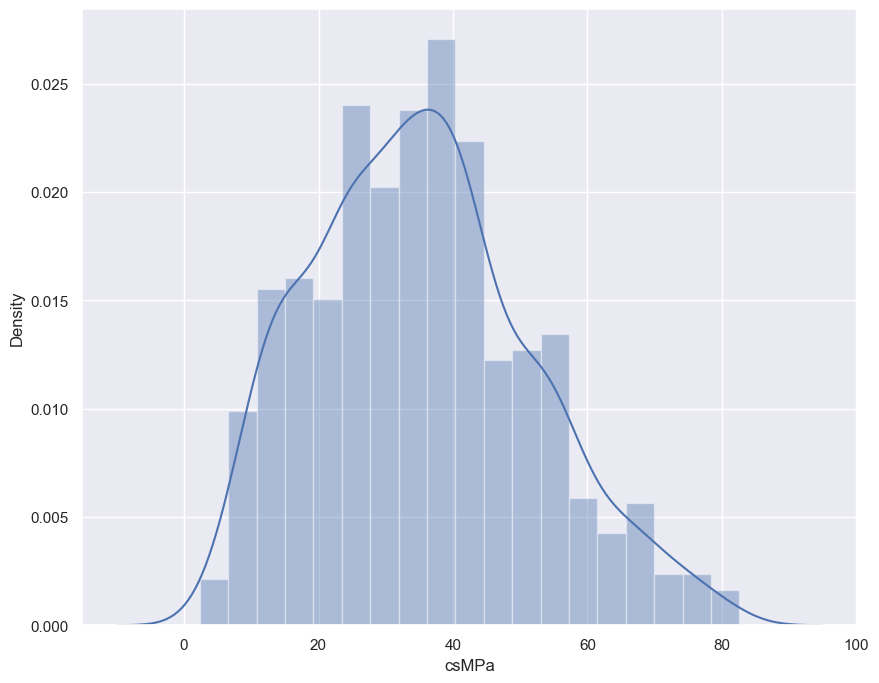

In [11]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

<h2 style="font-family: Times New Roman">Relationship Between Each Variable and Target Variable (csMPa)</h2>

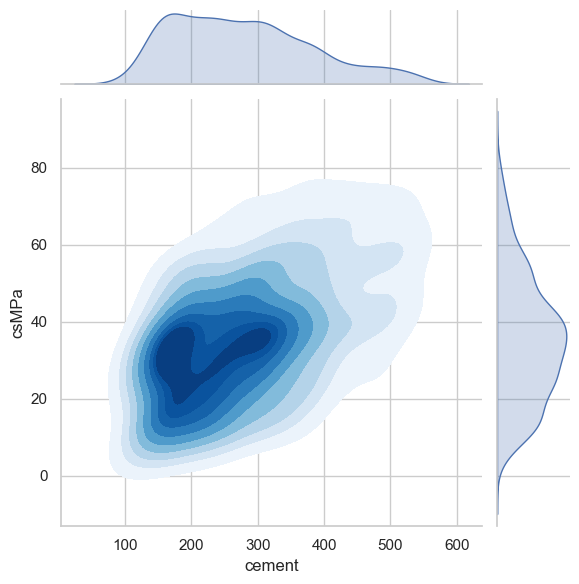

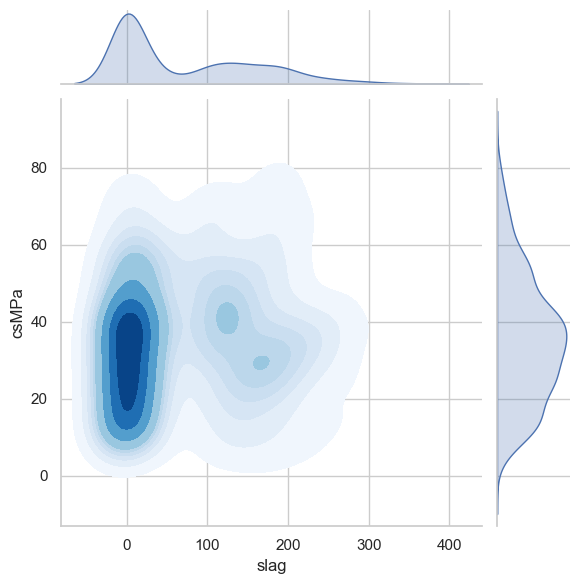

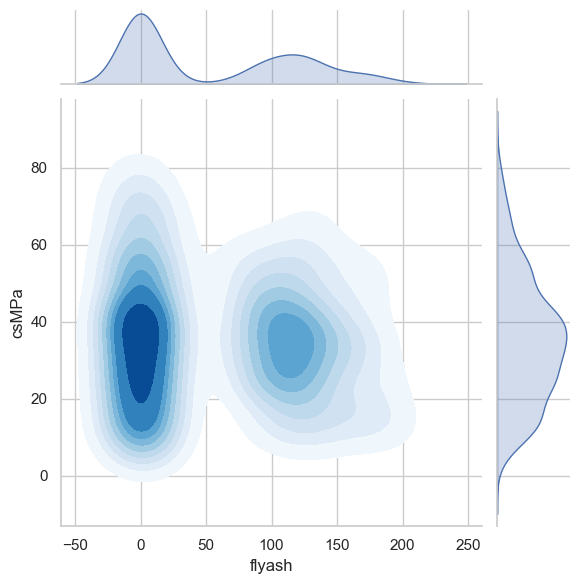

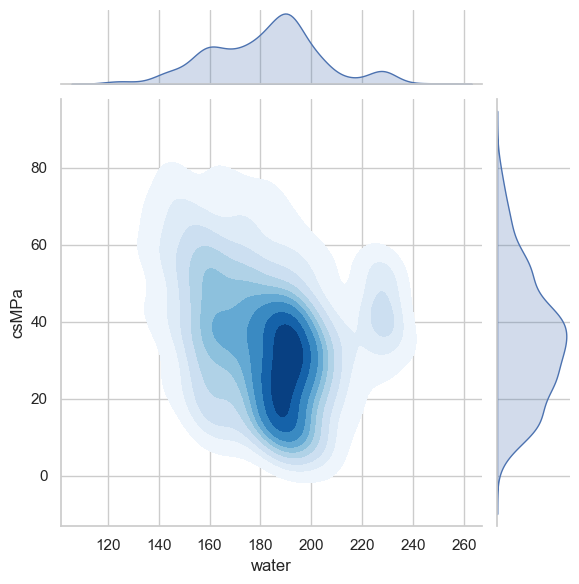

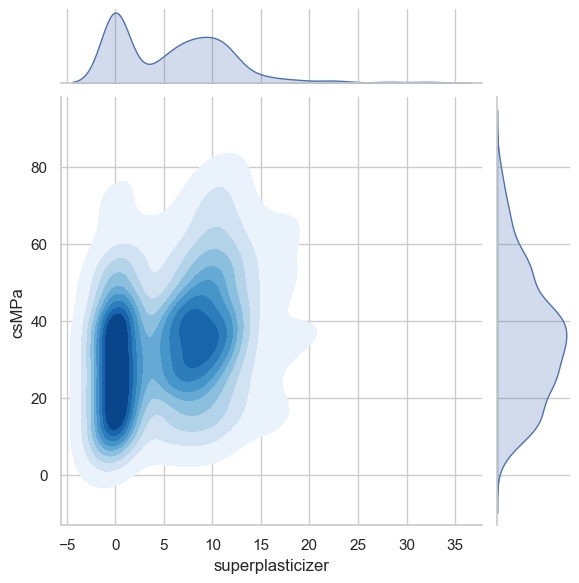

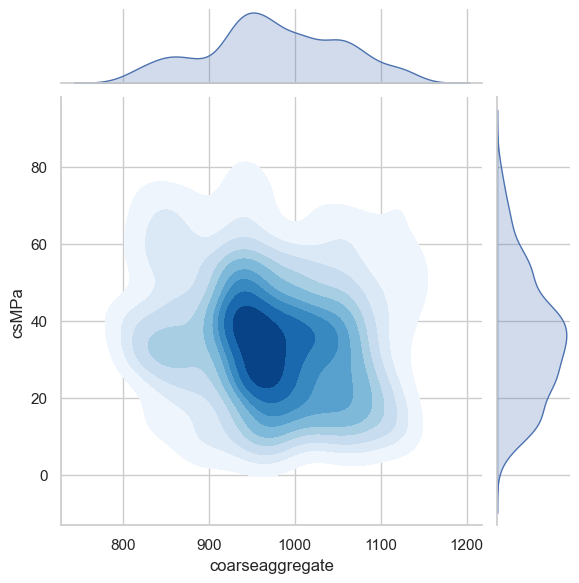

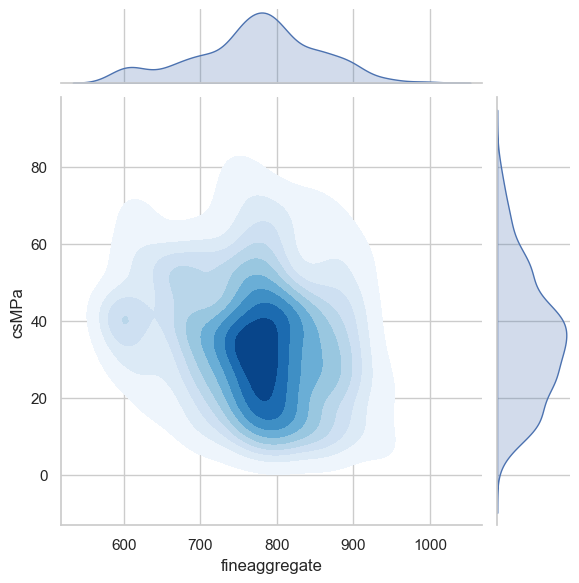

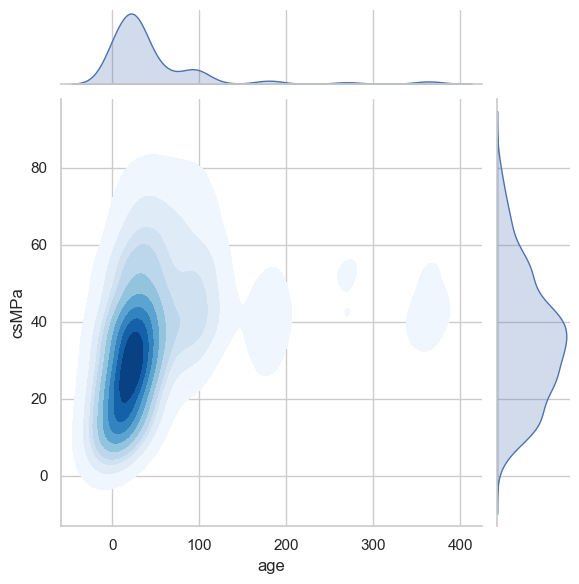

In [12]:
sns.set(style="whitegrid")

cols_without_y = df.drop("csMPa", axis=1).columns
for col in cols_without_y:
    sns.jointplot(x=df[col], y=df["csMPa"], kind="kde", cmap="Blues", fill=True)
    plt.show()

***Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

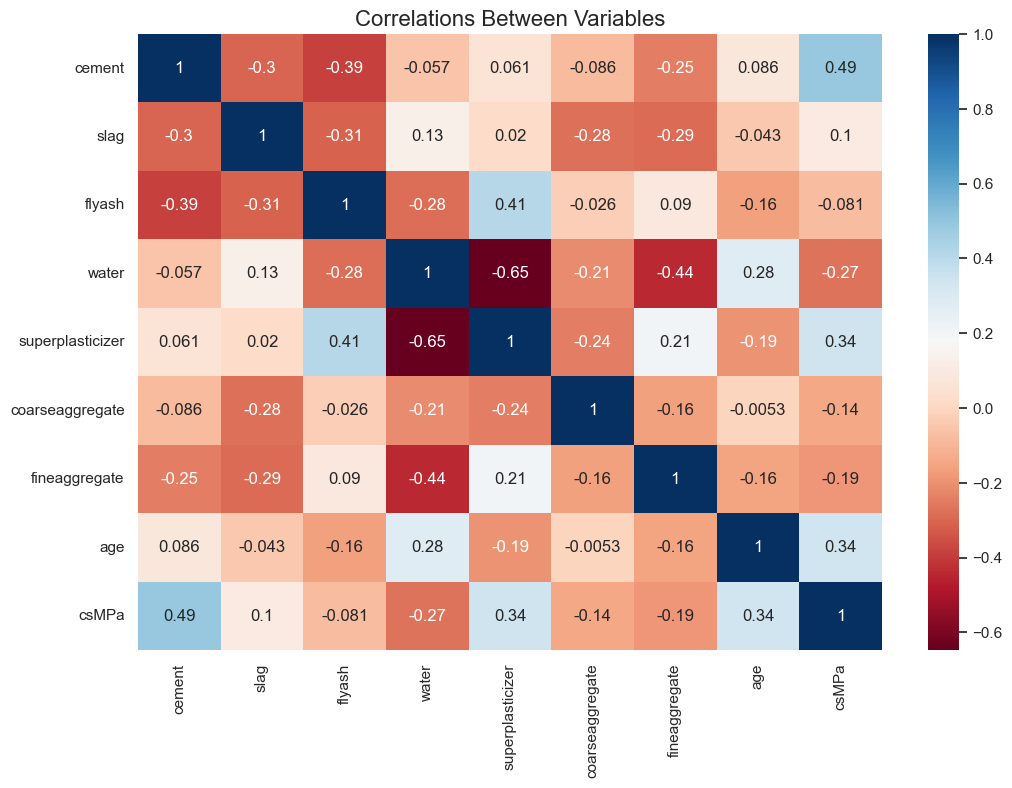

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=16)
plt.show()

# X, y Split

In [14]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

# Data Standardization

***Standardizing the columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.***

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split

***Splitting the data into Train and Test chunks for better evaluation.***

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

***Defining several evaluation functions for convenience.***

In [17]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

# Models Training (Phase-1)

In [18]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

<h2 style="font-family: Times New Roman">Linear Regression</h2>

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 8.52793265121777
MSE: 114.2947804792873
r2 Score: 0.5775339071194776
RMSE (Cross Validated): 10.983075882282812


<h2 style="font-family: Times New Roman">Lasso (L1 Regularization)</h2>

In [20]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 9.117096274379174
MSE: 121.7290790264741
r2 Score: 0.5500546202494485
RMSE (Cross Validated): 11.612295575311416


<h2 style="font-family: Times New Roman">Ridge (L2 Regularization)</h2>

In [21]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 8.520037264089748
MSE: 113.84241293222617
r2 Score: 0.579205986538603
RMSE (Cross Validated): 10.975634268892303


<h2 style="font-family: Times New Roman">Elastic Net</h2>

In [22]:
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 9.812608959809948
MSE: 140.5924885055728
r2 Score: 0.48033008105682606
RMSE (Cross Validated): 12.418741937178364


<h2 style="font-family: Times New Roman">Support Vector Machines</h2>

In [23]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 7.806627339225303
MSE: 93.92896794180157
r2 Score: 0.6528117563350677
RMSE (Cross Validated): 12.030395231584912


<h2 style="font-family: Times New Roman">Random Forest</h2>

In [24]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(rf)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 3.3657970587538517
MSE: 22.597029036864704
r2 Score: 0.9164749385065578
RMSE (Cross Validated): 10.039574061558014


<h2 style="font-family: Times New Roman">XGBoost</h2>

In [25]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(xgb)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
models = models._append(new_row, ignore_index=True)

MAE: 2.8307492793258744
MSE: 21.659397891196367
r2 Score: 0.919940690529638
RMSE (Cross Validated): 9.171330916827133


# Model Comparison

In [26]:
models.sort_values(by="RMSE (Cross Validated)")

,Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
6,XGBRegressor,2.830749,21.659398,0.919941,9.171331
5,RandomForestRegressor,3.365797,22.597029,0.916475,10.039574
2,Ridge,8.520037,113.842413,0.579206,10.975634
0,LinearRegression,8.527933,114.294780,0.577534,10.983076
1,Lasso,9.117096,121.729079,0.550055,11.612296
4,SVR,7.806627,93.928968,0.652812,12.030395
3,ElasticNet,9.812609,140.592489,0.480330,12.418742


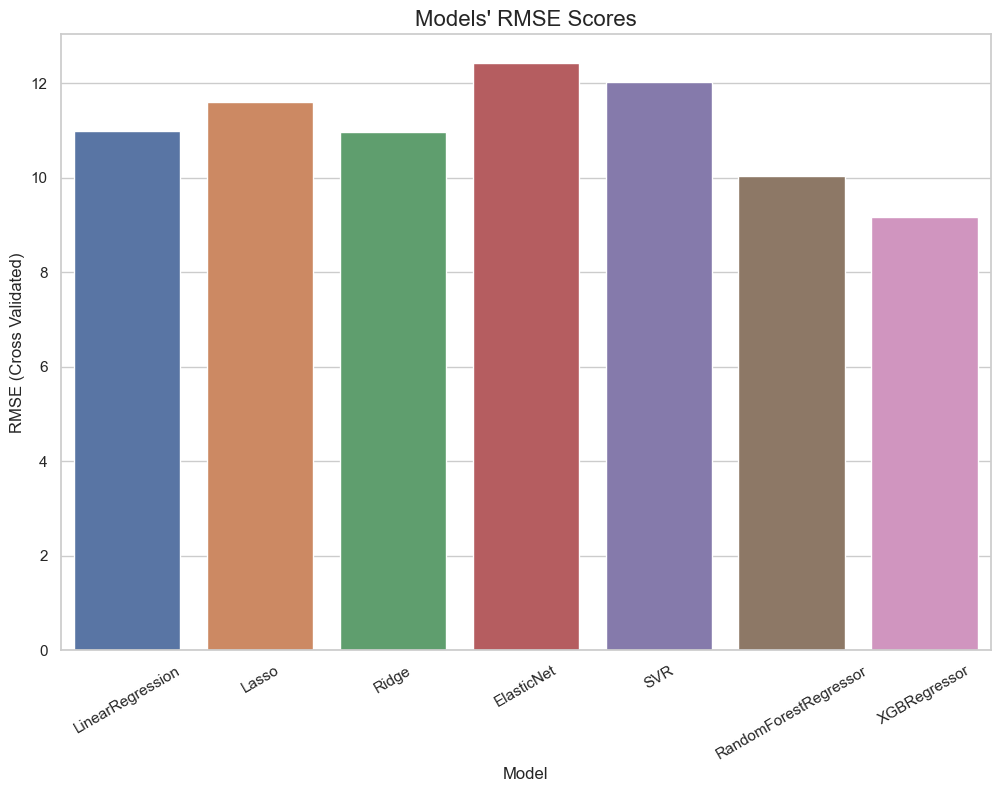

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores", size=16)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

In [28]:
tuned_models = pd.DataFrame(columns=["Tuned Model", "MAE", "MSE", "r2 Score", "RMSE (Cross Validated)"])

<h2 style="font-family: Times New Roman">Tuning the Lasso</h2>

In [29]:
lasso_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

lasso_grid = GridSearchCV(Lasso(), lasso_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [30]:
lasso_params = lasso_grid.best_params_

tuned_lasso = Lasso(**lasso_params)
tuned_lasso.fit(x_train, y_train)
y_pred = tuned_lasso.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(tuned_lasso)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models._append(new_row, ignore_index=True)

MAE: 8.52697842039794
MSE: 114.24626585267505
r2 Score: 0.5777132310104418
RMSE (Cross Validated): 10.982176732855292


<h2 style="font-family: Times New Roman">Tuning the Ridge</h2>

In [31]:
ridge_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

ridge_grid = GridSearchCV(Ridge(), ridge_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

ridge_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [32]:
ridge_params = ridge_grid.best_params_

tuned_ridge = Ridge(**ridge_params)
tuned_ridge.fit(x_train, y_train)
y_pred = tuned_ridge.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(tuned_ridge)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models._append(new_row, ignore_index=True)

MAE: 8.520037264089748
MSE: 113.84241293222617
r2 Score: 0.579205986538603
RMSE (Cross Validated): 10.975634268892303


<h2 style="font-family: Times New Roman">Tuning the Elastic Net</h2>

In [33]:
elasticnet_grid_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "l1_ratio": np.arange(0, 1, 0.05)}

elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

elasticnet_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [34]:
elasticnet_params = elasticnet_grid.best_params_

tuned_elasticnet = ElasticNet(**elasticnet_params)
tuned_elasticnet.fit(x_train, y_train)
y_pred = tuned_elasticnet.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(tuned_elasticnet)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "Elastic Net","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models._append(new_row, ignore_index=True)

MAE: 8.521341206895572
MSE: 113.92613358408464
r2 Score: 0.5788965311414647
RMSE (Cross Validated): 10.976968124113236


<h2 style="font-family: Times New Roman">Tuning the Support Vector Machines</h2>

In [35]:
svr_grid_params = {"kernel": ["linear", "rbf"],
                   "C": [1, 10, 100, 1000],
                   "epsilon": [0.001, 0.01, 0.1, 1, 10, 100],
                   "gamma": [0.001, 0.01, 0.1, 1]}

svr_grid = GridSearchCV(SVR(), svr_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

svr_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [36]:
svr_params = svr_grid.best_params_

tuned_svr = SVR(**svr_params)
tuned_svr.fit(x_train, y_train)
y_pred = tuned_svr.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(tuned_svr)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "SVR","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models._append(new_row, ignore_index=True)

MAE: 4.1659698861507755
MSE: 36.22812535029302
r2 Score: 0.8660905204512142
RMSE (Cross Validated): 12.796024212072165


<h2 style="font-family: Times New Roman">Tuning the Random Forest</h2>

In [38]:
rf_grid_params = {"n_estimators": [100, 200, 500],
                   "max_depth": [None, 2, 3, 5],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 5]}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_grid_params, cv=5, scoring="neg_mean_squared_error", verbose=0, n_jobs=-1)

rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [39]:
rf_params = rf_grid.best_params_

tuned_rf = RandomForestRegressor(**rf_params)
tuned_rf.fit(x_train, y_train)
y_pred = tuned_rf.predict(x_test)

mae, mse, r2 = evaluate(y_test, y_pred)
rmse = rmse_cv(tuned_rf)
print("MAE:", mae)
print("MSE:", mse)
print("r2 Score:", r2)
print("RMSE (Cross Validated):", rmse)

new_row = {"Tuned Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE (Cross Validated)": rmse}
tuned_models = tuned_models._append(new_row, ignore_index=True)

MAE: 3.31873236886993
MSE: 21.797341215098225
r2 Score: 0.9194308126783188
RMSE (Cross Validated): 10.17244523936401


# Model Comparison After Hyperparameter Tuning

In [40]:
tuned_models.sort_values(by="RMSE (Cross Validated)")

,Tuned Model,MAE,MSE,r2 Score,RMSE (Cross Validated)
4,RandomForestRegressor,3.318732,21.797341,0.919431,10.172445
1,Ridge,8.520037,113.842413,0.579206,10.975634
2,Elastic Net,8.521341,113.926134,0.578897,10.976968
0,Lasso,8.526978,114.246266,0.577713,10.982177
3,SVR,4.165970,36.228125,0.866091,12.796024


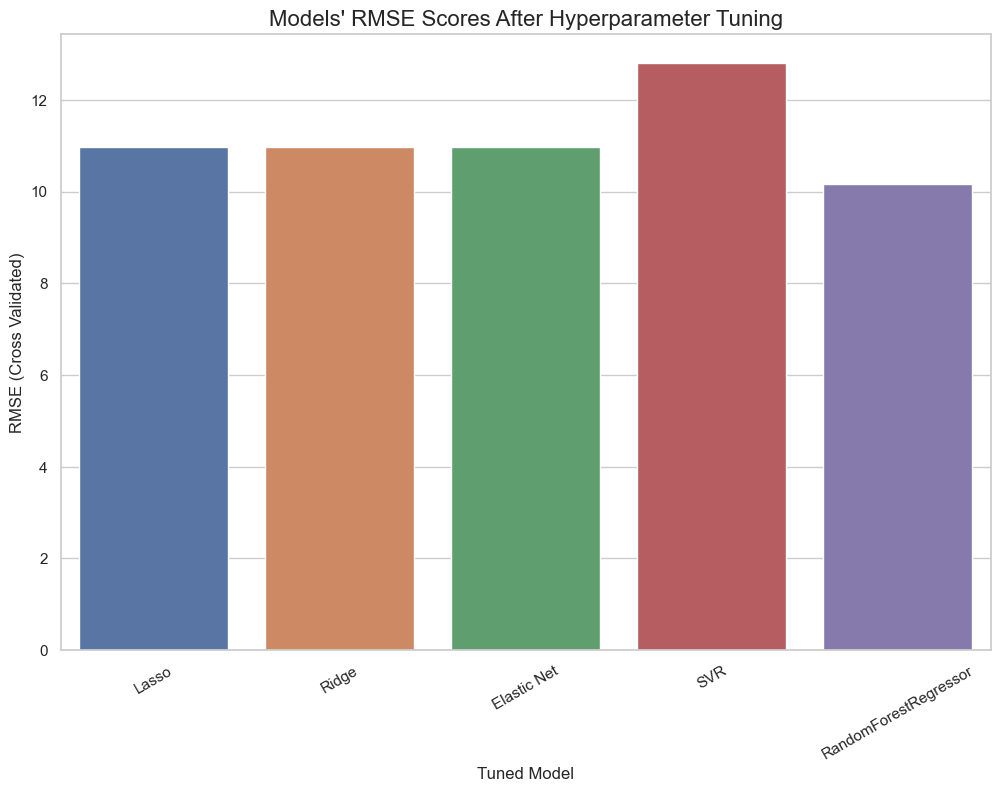

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x=tuned_models["Tuned Model"], y=tuned_models["RMSE (Cross Validated)"])
plt.title("Models' RMSE Scores After Hyperparameter Tuning", size=16)
plt.xticks(rotation=30)
plt.show()

# Conclusion

<h3 style="font-family: Times New Roman;">After Model Building and Hyperparameter Tuning processes, we can observe that even though we didn't apply Hyperparameter Tuning to XGBRegressor model, that is the one which yields the least RMSE score and the most R2 score.</h3>